In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.drop(['Loan_ID'],axis=1,inplace=True) 

In [6]:
df.isnull().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

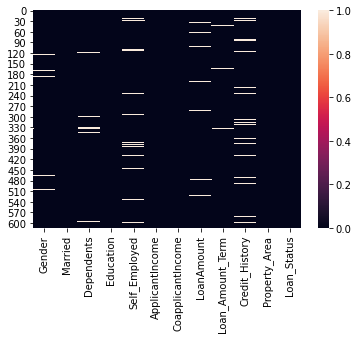

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
for i in df.columns:
    print(df[i].value_counts(dropna=False))  

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Yes    398
No     213
NaN      3
Name: Married, dtype: int64
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
360.0     1
53.0      1
65.0      1
156.0     1
89.0      1
Name: LoanAmount, Length: 204, dtype: int64
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.

In [10]:
df['Gender'].fillna('Male',inplace=True) 

In [11]:
df['Married'].fillna('Yes',inplace=True)

In [12]:
df['Dependents'].fillna('0',inplace=True)

In [13]:
df['Education'].fillna('Graduate',inplace=True)

In [14]:
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


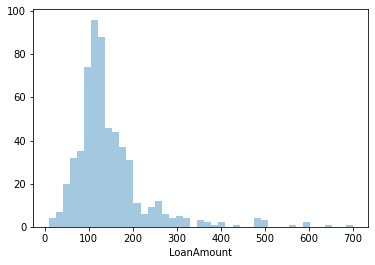

In [16]:
sns.distplot(df['LoanAmount'],kde=False)

In [17]:
df['LoanAmount'].fillna(128,inplace=True)

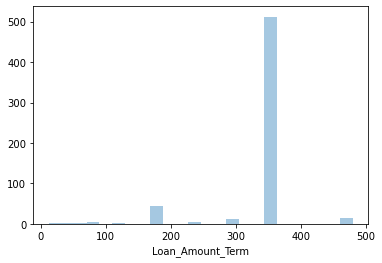

In [18]:
sns.distplot(df['Loan_Amount_Term'],kde=False)

In [19]:
df['Loan_Amount_Term'].fillna(360,inplace=True)

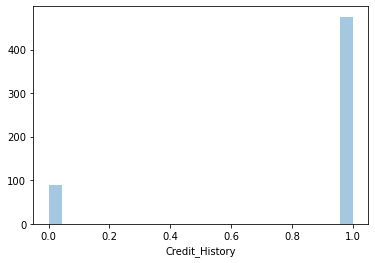

In [20]:
sns.distplot(df['Credit_History'],kde=False)

In [21]:
df['Credit_History'].fillna(1,inplace=True)

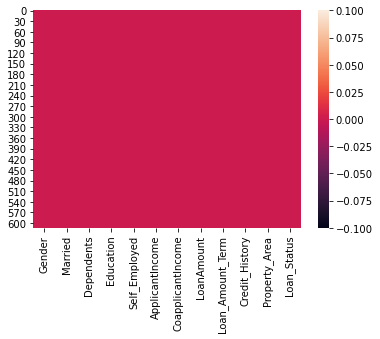

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

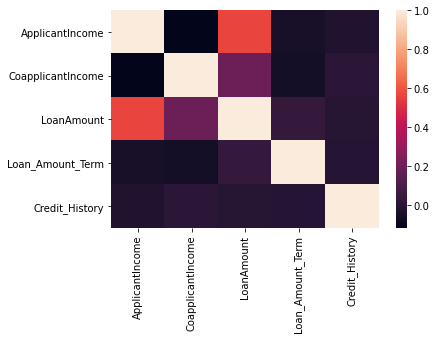

In [24]:
sns.heatmap(df.corr())

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
y=df['Loan_Status'].values

In [27]:
X=df.drop(['Loan_Status'],axis=1)

In [28]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [29]:
le=LabelEncoder()

In [30]:
for i in X.columns:
    if i in ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']:
        X[i]=le.fit_transform(X[i]) 

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [32]:
X=X.values

In [33]:
model=LogisticRegression(solver='liblinear')

In [34]:
model.fit(X,y)

LogisticRegression(solver='liblinear')

In [35]:
accuracy=model.score(X,y)*100

In [36]:
print(f"accuracy :{accuracy}%")

accuracy :81.10749185667753%


In [37]:
predictions=model.predict(X[:10])
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [38]:
y[:10]

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N'], dtype=object)

In [39]:
random=model.predict([[0,1,1,1,0,4583,158.0,128.0,30.0,1.0,0]])

In [40]:
random

array(['Y'], dtype=object)

In [41]:
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [42]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
test.drop(['Loan_ID'],axis=1,inplace=True)

In [44]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [45]:
test.shape

(367, 11)

In [46]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [48]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [49]:
for i in test.columns:
    print(test[i].value_counts(dropna=False))

Male      286
Female     70
NaN        11
Name: Gender, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64
0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64
3500     6
5000     6
3333     5
7500     4
4333     4
        ..
2366     1
2083     1
13633    1
3909     1
2875     1
Name: ApplicantIncome, Length: 314, dtype: int64
0       156
2000      3
700       3
2600      2
1083      2
       ... 
3900      1
2360      1
820       1
1966      1
4347      1
Name: CoapplicantIncome, Length: 194, dtype: int64
150.0    12
125.0    11
110.0    10
100.0     9
90.0      9
         ..
186.0     1
163.0     1
360.0     1
412.0     1
297.0     1
Name: LoanAmount, Length: 145, dtype: int64
360.0    311
180.0     22
480.0      8
300.0      7
NaN        6
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1

In [50]:
test['Self_Employed'].fillna('No',inplace=True)

In [51]:
test['Gender'].fillna('Male',inplace=True)

In [52]:
test['Credit_History'].fillna(1,inplace=True)

In [53]:
test['Education'].fillna('Graduate',inplace=True)

In [54]:
test['Dependents'].fillna('0',inplace=True)

In [55]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [56]:
test['LoanAmount'].fillna(125,inplace=True)

In [57]:
test['Loan_Amount_Term'].fillna(360,inplace=True)

In [58]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [60]:
for i in test.columns:
    if i in ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']:
        test[i]=le.fit_transform(test[i]) 

In [61]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [62]:
test.shape

(367, 11)

In [63]:
predictions=model.predict(test[:367])

In [64]:
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [65]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [70]:
test['Loan_Status']=predictions

In [71]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [72]:
test.to_csv("loan_predictions.csv",index=False)